# Functions and classes used to solve systems of linear equations

## Prepare functions used throughout program

### Import necessary libraries

In [1]:
import math
import copy
import time
%matplotlib inline

from IPython.display import display, Math, Latex
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 14,8

### Vector
Allows for addition and dot product calculations

In [2]:
class Vector():
    def __init__(self, l:list):
        self.l = l.copy()
        
        # how many numbers to print before replacing them with dots
        self.print_befor_dots = 4
        # how wide will the numbers be
        self.num_len = 6
    def __len__(self):
        return len(self.l)

    def __getitem__(self, item):
        return self.l[item]

    def __setitem__(self, key, value):
        self.l[key] = value

    def __neg__(self):
        return Vector([-elem for elem in self.l])

    def __add__(self, other):
        if isinstance(other, Vector) and len(self) == len(other):
            return Vector([e1+e2 for e1, e2 in zip(self.l, other.l)])
        else:
            raise ValueError("Addition operand is not a proper vector")

    def __sub__(self, other):
        if isinstance(other, Vector) and len(self) == len(other):
            return self + (-other)
        else:
            raise ValueError("Substraction operand is not a proper vector")

    #dot product
    def __mul__(self, other):
        if isinstance(other, Vector) and len(self) == len(other):
            vect = other
            sum = 0
            for i in range(len(self.l)):
                sum += self[i] * vect[i]
            return sum
        else:
            raise ValueError("Dot product operand is not a proper vector")

    def __str__(self):
        l_len = len(self.l)
        if l_len < self.print_befor_dots *2 + 1:
            string = '| '
            for i in range(l_len):
                round_to = self.num_len-2 if float(self.l[i]) > 0  else self.num_len-3
                fl_str = str(round(float(self.l[i]), round_to))
                zeroes = '0' * (self.num_len-len(fl_str))
                fl_str = fl_str + zeroes
                string += fl_str
                if i < l_len - 1:
                    string += ', '
            string += ' |'
            return string
        string = '| '
        for i in range(self.print_befor_dots):
            round_to = self.num_len-2 if float(self.l[i]) > 0  else self.num_len-3
            fl_str = str(round(float(self.l[i]), round_to))
            zeroes = '0' * (self.num_len - len(fl_str))
            fl_str = fl_str + zeroes
            string += fl_str
            string += ', '
        string += '... '
        for i in range(l_len-self.print_befor_dots, l_len):
            round_to = self.num_len-2 if float(self.l[i]) > 0  else self.num_len-3
            fl_str = str(round(float(self.l[i]), round_to))
            zeroes = '0' * (self.num_len - len(fl_str))
            fl_str = fl_str + zeroes
            string += fl_str
            if i < l_len - 1:
                string += ', '
        string += ' |'
        return string

### Square matrix
Allows multiplication with vectors and other matrices

In [3]:
class SqMatrix():
    def __init__(self, n: int):
        self.rows = [Vector([0 for _ in range(n)]) for _ in range(n)]
        self.n = n
        
        # how many rows to print before replacing them with dots
        self.print_befor_dots = 4
    def __getitem__(self, item: int):
        return self.rows[item]

    def get_column(self, colnum: int):
        column = []
        for row in self.rows:
            column.append(row[colnum])
        return Vector(column)

    def __mul__(self, other):
        if isinstance(other, Vector) and len(other) == self.n:
            vect = other
            result = []
            for row in self.rows:
                curr_result = 0
                for idx, elem_row in enumerate(row):
                    curr_result += vect[idx] * elem_row
                result.append(curr_result)
            return Vector(result)

        elif isinstance(other, SqMatrix) and other.n==self.n:
            n = self.n
            result = SqMatrix(n)
            for rowidx in range(n):
                for columnidx in range(n):
                    row = self.rows[rowidx]
                    column = other.get_column(columnidx)
                    #dot product
                    result[rowidx][columnidx] = row * column
            return result

        else:
            raise ValueError("Multiplication operand is not a proper vector/matrix")
            
    def __str__(self):
        string = ''
        l_rows = len(self.rows)
        if(l_rows < self.print_befor_dots*2 + 1):
            for row in self.rows:
                string += row.__str__()+ '\n'
            return string
        for i in range(self.print_befor_dots):
            string += self.rows[i].__str__() + '\n'
        len_row = len(self.rows[0].l)
        bef_dots_row = self.rows[0].print_befor_dots
        num_len = self.rows[0].num_len
        if len_row < 2*bef_dots_row + 1:
            string+= '| '
            for i in range(len_row):
                elem = ' ' * ((num_len+1)//2 - 1)
                elem += ':'
                elem += ' ' * (num_len//2)
                # accounts for ', '
                elem += '  '
                string += elem
            # removes last two spaces that were suppose to be below ', '
            string = string[:-2]
        else:
            string+= '| '
            for _ in range(bef_dots_row):
                elem = ' ' * ((num_len + 1) // 2 - 1)
                elem += ':'
                elem += ' ' * (num_len // 2)
                # accounts for ', '
                elem += '  '
                string += elem
            # accounts for '... '
            string += ' :  '
            for _ in range(bef_dots_row):
                elem = ' ' * ((num_len + 1) // 2 - 1)
                elem += ':'
                elem += ' ' * (num_len // 2)
                # accounts for ', '
                elem += '  '
                string += elem
            # removes last two spaces that were suppose to be below ', '
            string=string[:-2]
        string += ' |\n'

        for i in range(l_rows - self.print_befor_dots, l_rows):
             string += self.rows[i].__str__() + '\n'
        return string


### Band matrix
only allows to store band matricies of this exact format: 

$$\begin{bmatrix}
    a_{1} & a_{2} & a_{3} & 0 &  0 & 0 & 0 & 0 & \dots  & 0 \\
    a_{2} & a_{1} & a_{2} &  a_{3} & 0 & 0 & 0 & 0 &\dots  & 0 \\
    a_{3} & a_{2} & a_{1} &  a_{2} & a_{3} & 0 & 0 & 0 &\dots  & 0 \\
    0 & a_{3} & a_{2} &  a_{1} & a_{2} & a_{3} & 0 & 0 &\dots  & 0 \\
    0 & 0 & a_{3} &  a_{2} & a_{1} & a_{2} & a_{3} & 0 &\dots  & 0 \\
    \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots& \vdots \\
    0 & \dots & 0 & 0 & a_{3}  & a_{2} & a_{1} & a_{2} & a_{3}  & 0 \\
    0 & \dots & 0 & 0 & 0  & a_{3} & a_{2} & a_{1} & a_{2}  & a_{3} \\
    0 & \dots & 0 & 0 & 0  & 0 & a_{3} & a_{2} & a_{1}  & a_{2} \\
    0 & \dots & 0 & 0 & 0  & 0 & 0 & a_{3} & a_{2}  & a_{1}
\end{bmatrix}$$


In [4]:
class BandMatrix(SqMatrix):
    def __init__(self, n: int, a1: float, a2: float, a3: float):
        SqMatrix.__init__(self, n)

        for i in range(self.n):
            self[i][i] = a1
            if i-1 > 0:
                self[i][i-2] = a3
                self[i][i-1] = a2
            elif i > 0:
                self[i][i-1] = a2
            if i+1 < n-1:
                self[i][i+2] = a3
                self[i][i+1] = a2
            elif i < n-1:
                self[i][i+1] = a2


### Creating b vector
$$b = \begin{bmatrix}
b_{1}, b_{2}  \dots b_{N}
\end{bmatrix}$$

$$\textrm{Where:}$$
$$b_{i} = sin(i *(f+1)))$$
$$f = \textrm{some constant}$$

In [5]:
def create_b(n, f):
    return Vector([math.sin(i*(f+1)) for i in range(1, n+1)])

### Residue and Euclidean norm

In [6]:
def residue(A, b, x):
    return A*x -b

def second_norm(vect):
    return math.sqrt(sum([pow(elem, 2) for elem in vect]))

### Jacobi method

In [7]:
def jacobi(A, b, eps, max_iters=100):
    n = len(b)
    iters = 0
    x = Vector([1] * n)
    res = residue(A, b, x)
    while second_norm(res) > eps and iters<max_iters:
        iters+=1
        prev_x = copy.deepcopy(x)
        for i in range(n):
            x[i] = b[i] - sum([ A[i][j]*prev_x[j] for j in range(0, i)]) - sum([A[i][j]*prev_x[j] for j in range(i+1, n)])
            x[i] /= A[i][i]
        res = residue(A, b, x)
    return x, iters

### Gauss–Seidel method

In [8]:
def gauss_seidel(A, b, eps, max_iters=100):
    n = len(b)
    iters = 0
    x = Vector([1] * n)
    res = residue(A, b, x)
    while second_norm(res) > eps and iters<max_iters:
        iters+=1
        for i in range(n):
            x[i] = b[i] - sum([ A[i][j]*x[j] for j in range(0, i)]) - sum([A[i][j]*x[j] for j in range(i+1, n)])
            x[i] /= A[i][i]
        res = residue(A, b, x)
    return x, iters

### LU factorization

In [9]:
def lu_fact(A):
    n = A.n
    U = copy.deepcopy(A)

    L = SqMatrix(n)
    for i in range(n):
        L[i][i] = 1

    for k in range(n-1):
        for j in range(k+1, n):
            L[j][k] = U[j][k]/U[k][k]
            for z in range(k, n):
                U[j][z] = U[j][z] - L[j][k]*U[k][z]

    return L, U

### Forward and backward substitutions

In [10]:
def forward_substitution(L, b):
    n = L.n
    x = Vector([0]*n)
    for i in range(n):
        x[i] = b[i]
        for j in range(i):
            x[i] = x[i] - L[i][j] * x[j]
    return x

def backward_substitution(U, b):
    n = U.n
    x = Vector([0]*n)

    # iterates for i in <n-1, 0>
    for i in range(n-1, -1, -1):
        x[i] = b[i]
        #iterates for j in <n-1, i)
        for j in range(n-1, i, -1):
            x[i] = x[i] - U[i][j]*x[j]
        x[i] = x[i]/U[i][i]
    return x

### Solving system of linear equations using LU decomposition

In [11]:
def solve_with_LU(L,U, b):
    y = forward_substitution(L, b)
    return backward_substitution(U, y)


# Solving system of linear equtions using different methods

## Parameters and constants

### Constatnts associated with my student index
e - 4th digit \
f - 3rd digit \
c - 5th digit \
d - 6th digit 

In [12]:
e = 6
f = 4
c = 0
d = 0

### Parameters

In [13]:
N = 900 + c*10 + d
a1 = 5 + e
a2 = a3 = -1

### Creating system of linear equations

$$ Ax = b $$

$$\begin{bmatrix}
    a_{1} & a_{2} & a_{3} & 0 &  0 & 0 & 0 & 0 & \dots  & 0 \\
    a_{2} & a_{1} & a_{2} &  a_{3} & 0 & 0 & 0 & 0 &\dots  & 0 \\
    a_{3} & a_{2} & a_{1} &  a_{2} & a_{3} & 0 & 0 & 0 &\dots  & 0 \\
    0 & a_{3} & a_{2} &  a_{1} & a_{2} & a_{3} & 0 & 0 &\dots  & 0 \\
    0 & 0 & a_{3} &  a_{2} & a_{1} & a_{2} & a_{3} & 0 &\dots  & 0 \\
    \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots& \vdots \\
    0 & \dots & 0 & 0 & a_{3}  & a_{2} & a_{1} & a_{2} & a_{3}  & 0 \\
    0 & \dots & 0 & 0 & 0  & a_{3} & a_{2} & a_{1} & a_{2}  & a_{3} \\
    0 & \dots & 0 & 0 & 0  & 0 & a_{3} & a_{2} & a_{1}  & a_{2} \\
    0 & \dots & 0 & 0 & 0  & 0 & 0 & a_{3} & a_{2}  & a_{1}
\end{bmatrix}
\begin{bmatrix}
    x_{1} \\
    x_{2} \\
    x_{3} \\
    x_{4} \\
    x_{5} \\
    \vdots \\
    x_{n-3} \\
    x_{n-2} \\
    x_{n-1} \\
    x_{n} 
\end{bmatrix} = 
\begin{bmatrix}
    sin(1*(f+1)) \\
    sin(2*(f+1)) \\
    sin(3*(f+1)) \\
    sin(4*(f+1)) \\
    sin(5*(f+1)) \\
    \vdots \\
    sin((n-3)*(f+1)) \\
    sin((n-2)*(f+1)) \\
    sin((n-1)*(f+1)) \\
    sin(n*(f+1)) 
\end{bmatrix}$$

A matrix

In [14]:
A = BandMatrix(N, a1, a2, a3)
print(A)

| 11.000, -1.000, -1.000, 0.0000, ... 0.0000, 0.0000, 0.0000, 0.0000 |
| -1.000, 11.000, -1.000, -1.000, ... 0.0000, 0.0000, 0.0000, 0.0000 |
| -1.000, -1.000, 11.000, -1.000, ... 0.0000, 0.0000, 0.0000, 0.0000 |
| 0.0000, -1.000, -1.000, 11.000, ... 0.0000, 0.0000, 0.0000, 0.0000 |
|   :       :       :       :      :    :       :       :       :    |
| 0.0000, 0.0000, 0.0000, 0.0000, ... 11.000, -1.000, -1.000, 0.0000 |
| 0.0000, 0.0000, 0.0000, 0.0000, ... -1.000, 11.000, -1.000, -1.000 |
| 0.0000, 0.0000, 0.0000, 0.0000, ... -1.000, -1.000, 11.000, -1.000 |
| 0.0000, 0.0000, 0.0000, 0.0000, ... 0.0000, -1.000, -1.000, 11.000 |



b vector

In [15]:
b = create_b(N,f)
print(b)

| -0.959, -0.544, 0.6503, 0.9129, ... -0.930, -0.616, 0.5803, 0.9456 |


Epsilon

In [16]:
eps = pow(10, -9)
print('eps =', eps)

eps = 1e-09


## Solving using iterative methods

### Jacobi method

In [17]:
start = time.time()
x, iterations = jacobi(A,b,eps)
stop = time.time()
print('Jacobi: {time} seconds, {iters} iterations'.format(time=round(stop-start, 2), iters=iterations))

Jacobi: 8.19 seconds, 26 iterations


Solution:

In [18]:
print(x)

| -0.087, -0.046, 0.0529, 0.0752, ... -0.077, -0.050, 0.0490, 0.0859 |


### Gauss-Seidel method

In [19]:
start = time.time()
x, iterations = gauss_seidel(A,b,eps)
stop = time.time()
print('Gauss-Seidel: {time} seconds, {iters} iterations'.format(time=round(stop-start, 2), iters=iterations))

Gauss-Seidel: 5.67 seconds, 18 iterations


Solution:

In [20]:
print(x)

| -0.087, -0.046, 0.0529, 0.0752, ... -0.077, -0.050, 0.0490, 0.0859 |


## Different parameters for the same equations

In [21]:
N = 900 + c*10 + d
a1 = 3
a2 = a3 = -1

A matrix

In [22]:
A = BandMatrix(N, a1, a2, a3)
print(A)

| 3.0000, -1.000, -1.000, 0.0000, ... 0.0000, 0.0000, 0.0000, 0.0000 |
| -1.000, 3.0000, -1.000, -1.000, ... 0.0000, 0.0000, 0.0000, 0.0000 |
| -1.000, -1.000, 3.0000, -1.000, ... 0.0000, 0.0000, 0.0000, 0.0000 |
| 0.0000, -1.000, -1.000, 3.0000, ... 0.0000, 0.0000, 0.0000, 0.0000 |
|   :       :       :       :      :    :       :       :       :    |
| 0.0000, 0.0000, 0.0000, 0.0000, ... 3.0000, -1.000, -1.000, 0.0000 |
| 0.0000, 0.0000, 0.0000, 0.0000, ... -1.000, 3.0000, -1.000, -1.000 |
| 0.0000, 0.0000, 0.0000, 0.0000, ... -1.000, -1.000, 3.0000, -1.000 |
| 0.0000, 0.0000, 0.0000, 0.0000, ... 0.0000, -1.000, -1.000, 3.0000 |



b vector

In [23]:
b = create_b(N,f)
print(b)

| -0.959, -0.544, 0.6503, 0.9129, ... -0.930, -0.616, 0.5803, 0.9456 |


Epsilon

In [24]:
eps = pow(10, -9)
print('eps =', eps)

eps = 1e-09


## Checking if iterative methods converge for new equations

### Jacobi method


In [25]:
x, iterations = jacobi(A,b,eps, max_iters=50)
print('Jacobi method converges') if second_norm(residue(A, b, x)) < eps else print('Jacobi method diverges')

Jacobi method diverges


### Gauss-Seidel method
 

In [26]:
x, iterations = gauss_seidel(A,b,eps, max_iters=50)
print('Gauss-Seidel method converges') if second_norm(residue(A, b, x)) < eps else print('Gauss-Seidel method diverges')

Gauss-Seidel method diverges


## Solving new equations using LU decomposition

In [27]:
start = time.time()

L, U = lu_fact(A)
x = solve_with_LU(L, U, b)

stop = time.time()
print('Time: {t}'.format(t=round(stop-start, 2)))

Time: 121.41


Second norm of residue for LU decompositon

In [28]:
print(second_norm(residue(A, b, x)))

4.775221300020724e-13


# Comparing compution times of different methods

## Parameters and constants

I will be using same type of matrix just with different sizes

### Parameters

In [29]:
N = [100, 500, 1000, 2000, 3000]
a1 = 5 + e
a2 = a3 = -1

### Equations

In [30]:
A_list = [BandMatrix(n, a1, a2, a3) for n in N]
b_list = [create_b(n,f) for n in N]
eps = pow(10, -9)

## Calculations for each A, b

In [31]:
time_jacobi = []
time_gauss = []
time_lu = []
time_lu_no_fact = []
for A, b in zip(A_list, b_list):
    # jacobi
    start = time.time()
    x, iterations = jacobi(A,b,eps)
    stop = time.time()
    time_jacobi.append(stop-start)
    
    # gauss-seidel
    start = time.time()
    x, iterations = gauss_seidel(A,b,eps)
    stop = time.time()
    time_gauss.append(stop-start)
    
    # lu
    start = time.time()

    L, U = lu_fact(A)
    stop_lu_fact = time.time()
    x = solve_with_LU(L, U, b)
    stop = time.time()
    time_lu.append(stop-start)
    time_lu_no_fact.append(stop-stop_lu_fact)

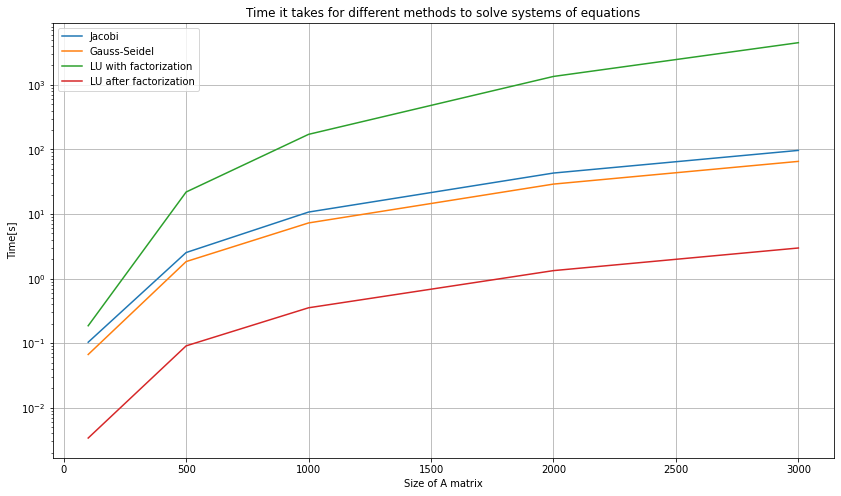

In [32]:
plt.semilogy(N, time_jacobi, label='Jacobi')
plt.semilogy(N, time_gauss, label='Gauss-Seidel')
plt.semilogy(N, time_lu, label='LU with factorization')
plt.semilogy(N, time_lu_no_fact, label='LU after factorization')


plt.grid(True)
plt.title('Time it takes for different methods to solve systems of equations')
plt.xlabel('Size of A matrix')
plt.ylabel('Time[s]')
plt.legend()

plt.show()

# Analyzing results

## Comparasion between 2 iterative methods

Jacobi method takes about 8.2s to solve first problem while Gauss-Seidel method takes about 5.7s. \
This gives us 30% better performance using Gauss-Seidel algorithm. \
Both methods diverge for the second problem.

## Comparasion between iterative methods and LU decomposition

Process of factorization is very expensive. It has O(n^3) time complexity which can be problematic for bigger matrices. But if we have L and U matrices created solving system of linear equations has O(n^2) time complexity which is much better. If we were to only change the b vector values we would do LU factorization once and solve equations with O(n^2) time complexity. \
Biggest difference is the fact that in iterative methods you can adjust precision to which you want to calculate the solution. This can reduce the time to solve systems of equations significantly if you do not need very precise results.

## Optimization of code

Code written above gives correct results but is very inefficient. The most important thing is that default python lists are not the best data structure to use while implemanting matricies and operations on them. Also there is just a lot of room left for optimization.